In [1]:
import os
os.chdir("..") # Change wd to root for easy dev

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from bwypy import Bwypy
from bwypy import QueryBuilder, AND, OR

In [12]:
endpoint = "http://bookworm.htrc.illinois.edu/cgi-bin/dbbindings.py"
database = "hathipd"
bw = Bwypy(endpoint=endpoint, db=database)

In [28]:
# Set up Query Builder
fieldl = bw.fields["dbname"].tolist()
qb = QueryBuilder(fieldl)
query = qb.search_limits((qb.date_year > 1825) |AND| (qb.date_year < 1923)).groups(qb.publication_country, qb.fiction_nonfiction).query
query

{'groups': [u'publication_country', u'fiction_nonfiction'],
 'search_limits': [{'$and': [{u'date_year': {'$gt': 1825}},
    {u'date_year': {'$lt': 1923}}]}]}

In [31]:
q = bw.default.copy()
q.update(query)
a = bw.search(q)
a

DEBUG:root:{'counttype': ['TextCount', 'WordCount'], 'search_limits': [{'$and': [{u'date_year': {'$gt': 1825}}, {u'date_year': {'$lt': 1923}}]}], 'groups': [u'publication_country', u'fiction_nonfiction'], 'database': 'hathipd', 'words_collation': 'Case_Sensitive', 'method': 'return_json', 'compare_limits': []}
DEBUG:root:Query time: 0s


TextCount     WordCount
publication_country                fiction_nonfiction                         
Canada                             unknown                 22629  5.510008e+09
                                   Not fiction             50035  2.652997e+09
United Kingdom Misc. Islands       Not fiction                 2  4.984400e+04
Scotland                           unknown                   274  6.645932e+07
                                   Not fiction               509  7.349713e+07
Wales                              unknown                     5  1.935640e+05
                                   Not fiction                33  1.194626e+07
Australia                          unknown                   557  1.874384e+08
                                   Not fiction               154  8.445965e+07
unknown                            unknown                675124  1.314691e+11
                                   Not fiction            891879  1.023963e+11
                                   Fiction                     6  4.861590e+05
Victoria                           unknown                    20  4.159620e+06
                                   Not fiction                16  2.075046e+06
Soviet Socialist Republic          unknown                    79  7.679560e+06
                                   Not fiction                40  4.455345e+06
Ukraine                            unknown                    45  5.984020e+06
                                   Not fiction                 4  3.254310e+05
No place, unknown, or undetermined unknown                  3221  4.152368e+08
                                   Not fiction              3173  3.966874e+08
Lithuania                          unknown                     8  9.289520e+05
Georgian S.S.R.                    unknown                     0  0.000000e+00
United States                      unknown                545161  1.292011e+11
                                   Not fiction            668734  7.827758e+10
                                   Fiction                   468  1.066673e+08
Latvia                             unknown                    55  1.865021e+07
                                   Not fiction                 9  1.223911e+06
Tasmania                           Not fiction                 1  8.426800e+04
South Australia                    unknown                    27  3.919678e+06
                                   Not fiction                 2  2.263890e+05
Soviet Union                       unknown                  8432  1.459001e+09
                                   Not fiction              4710  6.256750e+08
England                            unknown                  3047  7.679119e+08
                                   Not fiction              6439  8.446196e+08
Estonia                            unknown                    11  1.937086e+06
                                   Not fiction                 7  7.030020e+05
Russian S.F.S.R.                   unknown                  2690  6.920159e+08
                                   Not fiction               482  7.151275e+07
United Kingdom                     unknown                151607  3.976084e+10
                                   Not fiction            278654  3.694353e+10
                                   Fiction                    51  6.869181e+06
Northern Ireland                   unknown                     3  3.802600e+04
                                   Not fiction                 6  2.916500e+06
New South Wales                    unknown                     1  3.596570e+05
                                   Not fiction                 4  2.223350e+05

In [7]:
a.reset_index().dtypes

date_year      int64
TextCount      int64
WordCount    float64
dtype: object

DEBUG:root:{'counttype': ['TextCount'], 'search_limits': [{'date_year': {'$gte': 0}}], 'groups': ['date_year'], 'database': 'hathipd', 'words_collation': 'Case_Sensitive', 'method': 'return_json', 'compare_limits': []}
DEBUG:root:Query time: 0s


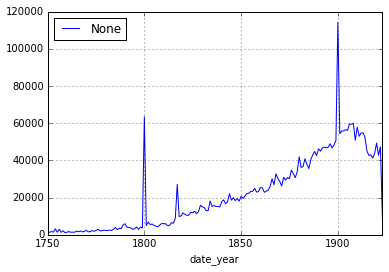

In [8]:
# Plot language
q = bw.default.copy()
q['search_limits'] = [{"date_year":{"$gte":0}}]
q['groups'] = ["date_year"]
q['counttype'] = ['TextCount']
a = bw.search(q)
a.sort(ascending=True, inplace=True)
a.loc[1750:1923].reset_index().plot(x="date_year", y="TextCount")

In [24]:
# Get TextCount and WordCount by year
query = qb.search_limits(qb.date_year <= 2016).groups(qb.date_year, qb.languages).query
q = bw.default.copy()
q.update(query)
bw.search(q)

DEBUG:root:{'counttype': ['TextCount', 'WordCount'], 'search_limits': [{u'date_year': {'$lte': 2016}}], 'groups': [u'date_year', u'languages'], 'database': 'hathipd', 'words_collation': 'Case_Sensitive', 'method': 'return_json', 'compare_limits': []}
DEBUG:root:Query time: 1s


TextCount  WordCount
date_year languages                               
1920      Austronesian                1      15628
          Unknown                   369   22248154
          Pampanga                    0          0
          Bulgarian                  24    3678862
          Multiple                   29    9744787
          Ancient Egyptian            1      17093
          French                   3315  401541399
          Bengali                     3     215906
          Tamil                       8      77666
          Finnish                    30    2425770
          Sundanese                   3      82360
          Hiligaynon                  0          0
          Tagalog                     4     111777
          Serbian                    61    6099073
          Church Slavic               1       9869
          Italian                   868   76537741
          Ancient Greek              28    2218680
          Czech                     221   22600396
          Slovak                     40    3791036
          Yiddish                   214   13101531
          Music                      78    1827361
          Ottoman Turkish            59    1152210
          Swedish                   211   21442468
          Marathi                     3     191712
          Mayan                       1      54258
          Slovenian                  12     367457
          Romance                     2     112184
          Old Proven303247al          1      97261
          Middle French               1      42578
          Cree                        1      12764
...                                 ...        ...
1539      Spanish                     3     198103
          English                     1      24448
          Italian                     6     666249
1652      Latin                     133   41489768
          Multiple                    1     210946
          German                      1       3224
          Dutch                       2     177836
          Japanese                   76      81980
          French                     10    2762799
          Ancient Greek               1      46352
          Greek                       1     465557
          Spanish                    45    6264101
          English                    17    1479477
          Korean                      1       2375
          Italian                    25    1552005
1662      Latin                     155   45223933
          Chinese                     7     151774
          German                      3     256489
          Dutch                       9     700781
          Japanese                   84      53541
          French                     21    3879331
          Ancient Greek               4     708027
          Persian                     0          0
          Spanish                    34    3652094
          English                    23    4080627
          Arabic                      1      56196
          Korean                      2      15526
          Italian                    13    1906066
1157      Chinese                     1       3671
2014      English                     1      52763

[15293 rows x 2 columns]

In [35]:
# Get TextCount and WordCount by year
query = qb.search_limits((qb.date_year > 1750) |AND| (qb.date_year < 1923)).groups(qb.languages).query
q = bw.default.copy()
q.update(query)
bw.search(q)

DEBUG:root:{'counttype': ['TextCount', 'WordCount'], 'search_limits': [{'$and': [{'date_year': {'$gt': 1750}}, {'date_year': {'$lte': 1923}}]}], 'groups': [u'languages'], 'database': 'hathipd', 'words_collation': 'Case_Sensitive', 'method': 'return_json', 'compare_limits': []}
DEBUG:root:Query time: 0s


{'counttype': ['TextCount', 'WordCount'], 'search_limits': [False], 'groups': [u'languages'], 'database': 'hathipd', 'words_collation': 'Case_Sensitive', 'method': 'return_json', 'compare_limits': []}
{'counttype': ['TextCount', 'WordCount'], 'search_limits': [{'$and': [{'date_year': {'$gt': 1750}}, {'date_year': {'$lte': 1923}}]}], 'groups': [u'languages'], 'database': 'hathipd', 'words_collation': 'Case_Sensitive', 'method': 'return_json', 'compare_limits': []}


,TextCount,WordCount
languages,,
Unknown,20829,1426995922
Palauan,1,46662
Fanti,4,1635484
Masai,2,36900
Bambara,3,427198
Santali,2,40480
Duala,5,221851
Votic,1,36622
Apache,1,141049
